Chapter 1 - Multinomial BNs - Expert-based Networks

Train Survey

Age - young, adult, old
Sex - male, female
Education - high (high-school), university degree
Occupation - emp (employee), self-employed (self)
Residence - city size: small, big
Transportation - car, train, other

In [3]:
#install.packages("bnlearn")   # Only needs to be run once
library(bnlearn)              # Run this every time you start R



  Random/Generated Bayesian network

  model:
   [A][S][E][O][R][T] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  generation algorithm:                  Empty 


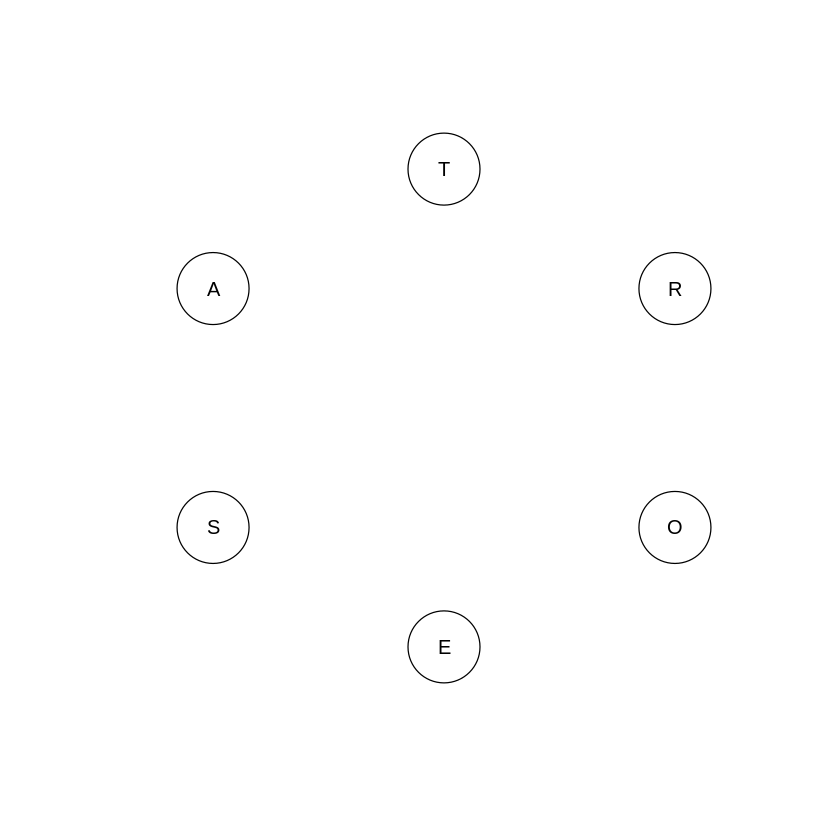

In [13]:
# create an empty graph
dag <- empty.graph(nodes = c("A", "S", "E", "O", "R", "T"))
dag #Summary of dag
plot(dag) # as graph is empty it will show the individual nodes

In [17]:
#defining the structural relationships

dag <- set.arc(dag, from = "A", to = "E") # age influences education
#adding a arc from A to E (adding edges between nodes)
dag <- set.arc(dag, from = "S", to = "E") # sex influences education
dag <- set.arc(dag, from = "E", to = "O") # ....
dag <- set.arc(dag, from = "E", to = "R") # ....
dag <- set.arc(dag, from = "O", to = "T") # ....
dag <- set.arc(dag, from = "R", to = "T") # ....

dag
# the markov and neighbhood size differs as there are new ars attchesd to edges
modelstring(dag)
nodes(dag) #nodes /edges are displayed
arcs(dag) # connectors are shown


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


[1] "[A][S][E|A:S][O|E][R|E][T|O:R]"

[1] "A" "S" "E" "O" "R" "T"

from,to
A,E
S,E
E,O
E,R
O,T
R,T


In [19]:
#same as previous steps defining da and arc but in programatic way

dag2 <- empty.graph(nodes = c("A", "S", "E", "O", "R", "T"))
arc.set <- matrix(c("A", "E",
                    "S", "E",
                    "E", "O",
                    "E", "R",
                    "O", "T",
                    "R", "T"), byrow = TRUE,
                    ncol = 2, dimnames = list(NULL, c("from", "to")))
arc.set
arcs(dag2) <- arc.set
dag2

# allow us to compare two dags
all.equal(dag, dag2)

# if we try to add an edge that results in a cycle - ERROR
# set.arc(dag, from = "T", to = "E")

from,to
A,E
S,E
E,O
E,R
O,T
R,T



  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


[1] TRUE

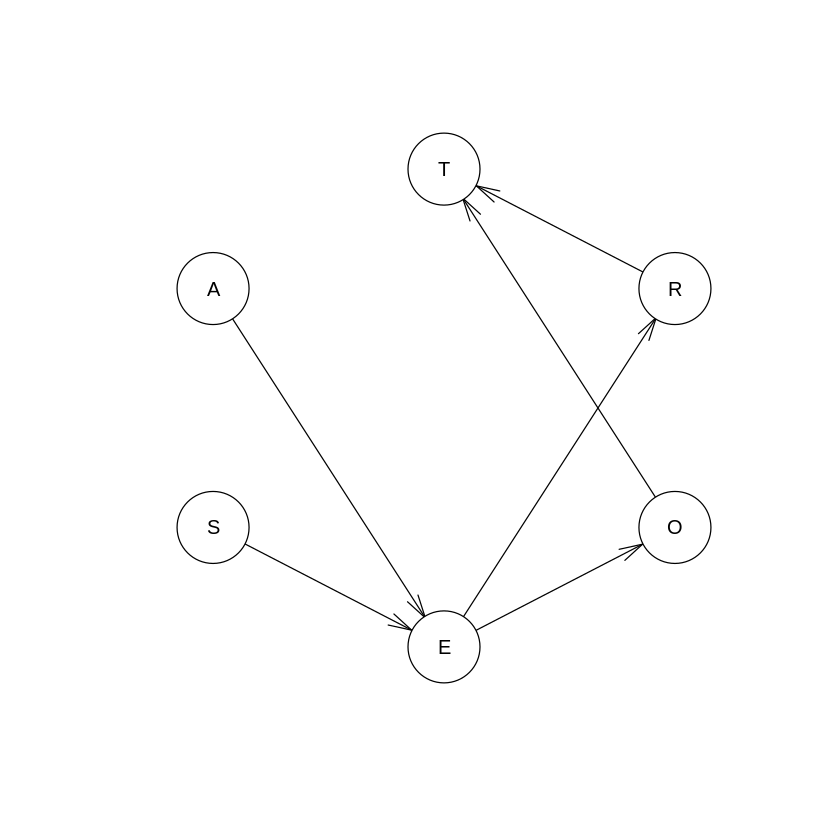

In [20]:
# Lets specify the probability distributions
plot(dag)

# define the states and levels of each parameter
#age , sex, education etc

A.lv <- c("young", "adult", "old")
S.lv <- c("M", "F")
E.lv <- c("high", "uni")
O.lv <- c("emp", "self")
R.lv <- c("small", "big")
T.lv <- c("car", "train", "other")

In [21]:
# specify the CPT for every node ("Expert Defined") - conditional probability  for each node


#distribution for node "A" (Age). Since "A" has no parents in your network structure, this is a prior probability distribution.
#It states that the probability of being "young" is 0.30, "adult" is 0.50, and "old" is 0.20.

A.prob <- array(c(0.30, 0.50, 0.20), dim = 3, dimnames = list(A = A.lv))
#A.prob

S.prob <- array(c(0.60, 0.4), dim = 2, dimnames = list(S=S.lv))
#S.prob

O.prob <- array(c(0.96, 0.04, 0.92, 0.08), dim = c(2,2),
                dimnames = list(O=O.lv, E=E.lv))
#O.prob

# alternative way (aside)
# o.cpt <- cbind(c(0.96, 0.04), c(.92, 0.08))
# dimnames(o.cpt) = list(O = O.lv, E = E.lv)
# o.cpt

R.prob <- array(c(0.25, 0.75, 0.20, 0.80), dim = c(2,2),
               dimnames = list(R = R.lv, E = E.lv))
#R.prob

E.prob <- array(c(0.75, 0.25, 0.72, 0.28, 0.88, 0.12, 0.64,
                  0.36, 0.70, 0.30, 0.90, 0.10), dim = c(2,3,2), dimnames = list(E=E.lv, A = A.lv, S = S.lv))

T.prob <- array(c(0.48, 0.42, 0.10, 0.56, 0.36, 0.08, 0.58,
                 0.24, 0.18, 0.70, 0.21, 0.09), dim = c(3,2,2),
                dimnames = list(T=T.lv, O = O.lv, R = R.lv))

In [22]:
# one more way to specify the dag
modelstring(dag)
dag3 <- model2network("[A][S][E|A:S][O|E][R|E][T|O:R]")
all.equal(dag,dag3)

[1] "[A][S][E|A:S][O|E][R|E][T|O:R]"

[1] TRUE

In [23]:
# parameterize the network
cpt <- list(A = A.prob, S = S.prob, E = E.prob, O = O.prob, R = R.prob,
           T = T.prob)
bn <- custom.fit(dag, dist = cpt)
nparams(bn)
arcs(bn)
bn$T
bn


Warning message in nparams(bn):
“the effective argument is deprecated and will be removed in 2025.”


[1] 21

from,to
A,E
S,E
E,O
E,R
O,T
R,T



  Parameters of node T (multinomial distribution)

Conditional probability table:
 
, , R = small

       O
T        emp self
  car   0.48 0.56
  train 0.42 0.36
  other 0.10 0.08

, , R = big

       O
T        emp self
  car   0.58 0.70
  train 0.24 0.21
  other 0.18 0.09



  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
 A
young adult   old 
  0.3   0.5   0.2 

  Parameters of node S (multinomial distribution)

Conditional probability table:
 S
  M   F 
0.6 0.4 

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , S = M

      A
E      young adult  old
  high  0.75  0.72 0.88
  uni   0.25  0.28 0.12

, , S = F

      A
E      young adult  old
  high  0.64  0.70 0.90
  uni   0.36  0.30 0.10


  Parameters of node O (multinomial distribution)

Conditional probability table:
 
      E
O      high  uni
  emp  0.96 0.92
  self 0.04 0.08

  Parameters of node R (multinomial distribution)

Conditional probability table:
 
       E
R       high  uni
  small 0.25 0.20
  big   0.75 0.80

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
, , R = small

       O
T        emp self
  car   0.48 0.56
  train 0.42 0.36
  other 0.10 0.08